# ICO Fraud detection - First Exploratory Data Analysis (EDA)
### Objective:
The goal of this notebook is to explore the ICO data through a series of aggregations and visualizations.


In [92]:
import pandas as pd
import os
import matplotlib.pyplot as plt

## 1. Accessing Etherscam API
https://pypi.org/project/etherscan/

In [27]:
import etherscan
API_KEY = '4JPN4KUGGGRIZNRD9E3KDXCZFNF4Y9XVMP'

In [28]:
es = etherscan.Client(
    api_key=API_KEY,
    cache_expire_after=5,
)

eth_price = es.get_eth_price()
eth_price

{'ethbtc': 0.02443,
 'ethbtc_timestamp': 1593291550,
 'ethusd': 218.59,
 'ethusd_timestamp': 1593291550}

In [29]:
eth_supply = es.get_eth_supply()
eth_supply

111527095624000000000000000

In [30]:
eth_balance = es.get_eth_balance('0x06cea18dc00394f602a7c48935e0e91b9ed1a9fce632cc137b649f94a48fcc66')
eth_balance

0

In [31]:
eth_balances = es.get_eth_balances([
    '0x39eB410144784010b84B076087B073889411F878',
    '0x39eB410144784010b84B076087B073889411F879',
])
eth_balances

{'0x39eB410144784010b84B076087B073889411F878': 8541713200000000,
 '0x39eB410144784010b84B076087B073889411F879': 0}

In [32]:
gas_price = es.get_gas_price()
gas_price

33000000000

In [120]:
block = es.get_block_by_number(block_number=12943)
block

{'difficulty': '0xb48297274f',
 'extraData': '0x426974636f696e2069732054484520426c6f636b636861696e2e',
 'gasLimit': '0x1388',
 'gasUsed': '0x0',
 'hash': '0xdcdf2fd2d0505334ec77b381e277cce289cfa64d5d2e121690726ed1f06dce5a',
 'logsBloom': '0x00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000',
 'miner': '0x1b7047b4338acf65be94c1a3e8c5c9338ad7d67c',
 'mixHash': '0xe810422ab51839025a82d225803cc4a72ee8a5ed23c0c0bc8207f9f13f7d770e',
 'nonce': '0x01690a3bd4064766',
 'number': '0x328f',
 'parentHash': '0x3603edba577a45ccc011743440ac43b6e48

In [123]:
transactions = es.get_transactions_by_address('0xd8dc1070b5510583728ee2afd6934877ea2de474')
pd.DataFrame.from_dict(transactions)

,timestamp,block_number,from,to,input,hash,value,gas,gas_price,gas_used,nonce,confirmations,is_error,tx_receipt_status,transaction_index,cumulative_gas_used,block_hash
0,1569527775,8626491,0xa805e4a1907d7db21409cb1724e31e93b6f65369,None,0x608060405233600160006101000a81548173ffffffff...,0x06cea18dc00394f602a7c48935e0e91b9ed1a9fce632...,0,2932029,14000000000,2932029,5,1723787,False,True,42,8767783,0x7ad0e689cde74baeb65b282d9aa059c924b8d758f581...
1,1569528157,8626518,0xa805e4a1907d7db21409cb1724e31e93b6f65369,0xd8dc1070b5510583728ee2afd6934877ea2de474,0x,0x48b8600c4eef68f17300b8797b3064c40a9954e5290c...,0,100000,20000000000,79462,6,1723760,False,True,88,3828429,0x5af0295764998590bf79bf02cd6d9cea4fc2267f27e3...
2,1569548940,8628049,0xa805e4a1907d7db21409cb1724e31e93b6f65369,0xd8dc1070b5510583728ee2afd6934877ea2de474,0xf3ccb401000000000000000000000000000000000000...,0xcb46386ac3a5bfdbac997b4b89c5a2ba550cf9f91a02...,0,347436,21000000000,347436,8,1722229,False,True,81,4575351,0x6de364a0b9cec8fb3a0cd7a4235692d88abf0b9c90f4...
3,1569553009,8628364,0x9c5fd85a035129f7ea1e6b61f915a98a96a15a22,0xd8dc1070b5510583728ee2afd6934877ea2de474,0x,0x88f213efc49f01bf65de14afa22bd6646ee2850b19ef...,0,60000,18000000000,60000,49,1721914,True,False,147,8257089,0x8a7bcd497af38d81cebf19bb8254b674d97a187b22b4...
4,1569553132,8628370,0x07195ba1de6b040198760bcdbc28c0cfcb6c9773,0xd8dc1070b5510583728ee2afd6934877ea2de474,0x,0xd72e18a9a68a2b4b39fb2fe01927ea7d9cdffdd5535e...,0,21000,15800000000,21000,70,1721908,True,False,217,9955617,0x73625caffb970f6750332ecfcf33bbc420838740fb3d...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1569656190,8636000,0xffa18b27729f544bd4a64c5d585acbebbde2f551,0xd8dc1070b5510583728ee2afd6934877ea2de474,0x,0x6a35f3a9fcf52d30c1e8c809ab97ea5dcb8c39817c13...,0,103300,6744750080,79462,3,1714278,False,True,99,8318914,0xbc828be128f0e9fb11e4af55808d17f62f80e0c4cd83...
996,1569656465,8636024,0x9b531bfb4dd32018be64083b1ff0ebf94b8cbc9c,0xd8dc1070b5510583728ee2afd6934877ea2de474,0x,0x97395b6fd265825544002e72a0e60eb5492f881971ca...,0,100000,20000000000,79462,136,1714254,False,True,104,4146511,0x7b2637889212aba64e46351ecb21e3441e557c35d861...
997,1569656465,8636024,0xed545f8187ee9ecd0ebf9bb292d2628cc83f0228,0xd8dc1070b5510583728ee2afd6934877ea2de474,0x,0xc646ab19c5a0d9ae876f6a52967764b96d42747f1847...,0,100000,8000000000,79462,6,1714254,False,True,202,7720680,0x7b2637889212aba64e46351ecb21e3441e557c35d861...
998,1569656505,8636029,0x10becf4648cf1d4e3b4d8df79efee3100a5d8ca4,0xd8dc1070b5510583728ee2afd6934877ea2de474,0x,0xe597fa43e61e5abe9a2e4270654012788af0467fcef8...,0,75712,4281250000,75712,8,1714249,True,False,47,3306879,0x16ec9949b2b654f38aa62cc784cf1a79e36bc31644de...


In [35]:
es.get_transactions_by_address('0x06cea18dc00394f602a7c48935e0e91b9ed1a9fce632cc137b649f94a48fcc66')
#transactions

--- Etherscan.io Message --- No transactions found


[]

In [36]:
token_transations = es.get_token_transactions(
    contract_address='0xd8dc1070b5510583728ee2afd6934877ea2de474',
    address='0xd8dc1070b5510583728ee2afd6934877ea2de474',
)
token_transations

--- Etherscan.io Message --- No transactions found


[]

## 1. Loading a ICO csv file


### 1.1. Token file

In [74]:
file_path = '/home/gabriel/Documents/Repos/time_series_study/data_and_models/dadosicocomsucesso/AIGO_SC.csv'
df_ico = pd.read_csv(file_path, sep=';')

In [75]:
df_ico.describe()

,Blockno,UnixTimestamp,Value_IN(ETH),Value_OUT(ETH),CurrentValue @ $242.14/Eth,TxnFee(ETH),TxnFee(USD),Historical $Price/Eth,Unnamed: 15
count,3.964000e+03,3.964000e+03,3964.000000,3964.0,3964.000000,3964.000000,3964.000000,3964.000000,0.0
mean,8.690786e+06,1.570414e+09,0.001769,0.0,0.001199,0.000785,0.129016,175.110136,NaN
std,1.222558e+05,1.721310e+06,0.047622,0.0,0.027573,0.015919,0.286476,9.295159,NaN
min,8.626491e+06,1.569528e+09,0.000000,0.0,0.000000,0.000021,0.005085,122.110000,NaN
25%,8.635950e+06,1.569655e+09,0.000000,0.0,0.000000,0.000044,0.010762,174.140000,NaN
50%,8.640678e+06,1.569719e+09,0.000000,0.0,0.000000,0.000397,0.096205,174.390000,NaN
75%,8.709309e+06,1.570647e+09,0.000000,0.0,0.000000,0.000554,0.134140,181.370000,NaN
max,1.004756e+07,1.589235e+09,2.000000,0.0,1.374677,1.000000,9.939461,258.720000,NaN


In [76]:
df_ico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3964 entries, 0 to 3963
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Txhash                      3964 non-null   object 
 1   Blockno                     3964 non-null   int64  
 2   UnixTimestamp               3964 non-null   int64  
 3   DateTime                    3964 non-null   object 
 4   From                        3964 non-null   object 
 5   To                          3963 non-null   object 
 6   ContractAddress             1 non-null      object 
 7   Value_IN(ETH)               3964 non-null   float64
 8   Value_OUT(ETH)              3964 non-null   int64  
 9   CurrentValue @ $242.14/Eth  3964 non-null   float64
 10  TxnFee(ETH)                 3964 non-null   float64
 11  TxnFee(USD)                 3964 non-null   float64
 12  Historical $Price/Eth       3964 non-null   float64
 13  Status                      833 n

In [77]:
df_ico.head(3)

,Txhash,Blockno,UnixTimestamp,DateTime,From,To,ContractAddress,Value_IN(ETH),Value_OUT(ETH),CurrentValue @ $242.14/Eth,TxnFee(ETH),TxnFee(USD),Historical $Price/Eth,Status,ErrCode,Unnamed: 15
0,0x06cea18dc00394f602a7c48935e0e91b9ed1a9fce632...,8626491,1569527775,2019-09-26 19:56:15,0xa805e4a1907d7db21409cb1724e31e93b6f65369,NaN,0xd8dc1070b5510583728ee2afd6934877ea2de474,0.0,0,0.0,0.041048,9.939461,166.06,NaN,NaN,NaN
1,0x48b8600c4eef68f17300b8797b3064c40a9954e5290c...,8626518,1569528157,2019-09-26 20:02:37,0xa805e4a1907d7db21409cb1724e31e93b6f65369,0xd8dc1070b5510583728ee2afd6934877ea2de474,NaN,0.0,0,0.0,0.001589,0.384819,166.06,NaN,NaN,NaN
2,0xcb46386ac3a5bfdbac997b4b89c5a2ba550cf9f91a02...,8628049,1569548940,2019-09-27 01:49:00,0xa805e4a1907d7db21409cb1724e31e93b6f65369,0xd8dc1070b5510583728ee2afd6934877ea2de474,NaN,0.0,0,0.0,0.007296,1.766691,174.39,NaN,NaN,NaN


### 1.2. Convert `DateTime`column to datetime dtype

In [78]:
df_ico['DateTime'] = pd.to_datetime(df_ico['DateTime'])
df_ico.dtypes

Txhash                                object
Blockno                                int64
UnixTimestamp                          int64
DateTime                      datetime64[ns]
From                                  object
To                                    object
ContractAddress                       object
Value_IN(ETH)                        float64
Value_OUT(ETH)                         int64
CurrentValue @ $242.14/Eth           float64
TxnFee(ETH)                          float64
TxnFee(USD)                          float64
Historical $Price/Eth                float64
Status                                object
ErrCode                               object
Unnamed: 15                          float64
dtype: object

### 1.3. Create column with time difference

In [79]:
df_ico['time_diff'] = df_ico['DateTime'].diff()
df_ico['time_diff_seconds'] = df_ico['DateTime'].diff().dt.seconds
df_ico.head(3)

,Txhash,Blockno,UnixTimestamp,DateTime,From,To,ContractAddress,Value_IN(ETH),Value_OUT(ETH),CurrentValue @ $242.14/Eth,TxnFee(ETH),TxnFee(USD),Historical $Price/Eth,Status,ErrCode,Unnamed: 15,time_diff,time_diff_seconds
0,0x06cea18dc00394f602a7c48935e0e91b9ed1a9fce632...,8626491,1569527775,2019-09-26 19:56:15,0xa805e4a1907d7db21409cb1724e31e93b6f65369,NaN,0xd8dc1070b5510583728ee2afd6934877ea2de474,0.0,0,0.0,0.041048,9.939461,166.06,NaN,NaN,NaN,NaT,NaN
1,0x48b8600c4eef68f17300b8797b3064c40a9954e5290c...,8626518,1569528157,2019-09-26 20:02:37,0xa805e4a1907d7db21409cb1724e31e93b6f65369,0xd8dc1070b5510583728ee2afd6934877ea2de474,NaN,0.0,0,0.0,0.001589,0.384819,166.06,NaN,NaN,NaN,00:06:22,382.0
2,0xcb46386ac3a5bfdbac997b4b89c5a2ba550cf9f91a02...,8628049,1569548940,2019-09-27 01:49:00,0xa805e4a1907d7db21409cb1724e31e93b6f65369,0xd8dc1070b5510583728ee2afd6934877ea2de474,NaN,0.0,0,0.0,0.007296,1.766691,174.39,NaN,NaN,NaN,05:46:23,20783.0


In [80]:
df_ico[['time_diff', 'time_diff_seconds']].describe()

,time_diff,time_diff_seconds
count,3963,3963.000000
mean,0 days 01:22:52.819328,1876.982841
std,0 days 22:22:04.444073,8135.360366
min,0 days 00:00:00,0.000000
25%,0 days 00:00:00,0.000000
50%,0 days 00:00:09,9.000000
75%,0 days 00:02:50,170.000000
max,53 days 19:40:25,83762.000000


### 1.4. Histogram for difference in seconds between transactions

/home/gabriel/miniconda3/envs/scorecard/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/gabriel/miniconda3/envs/scorecard/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([3.612e+03, 7.100e+01, 3.800e+01, 2.600e+01, 1.900e+01, 3.200e+01,
        7.000e+00, 1.200e+01, 1.800e+01, 1.500e+01, 7.000e+00, 8.000e+00,
        6.000e+00, 5.000e+00, 7.000e+00, 5.000e+00, 4.000e+00, 6.000e+00,
        8.000e+00, 2.000e+00, 3.000e+00, 5.000e+00, 7.000e+00, 3.000e+00,
        2.000e+00, 4.000e+00, 1.000e+00, 4.000e+00, 1.000e+00, 5.000e+00,
        2.000e+00, 5.000e+00, 4.000e+00, 2.000e+00, 1.000e+00, 2.000e+00,
        1.000e+00, 0.000e+00, 2.000e+00, 1.000e+00]),
 array([    0.  ,  2094.05,  4188.1 ,  6282.15,  8376.2 , 10470.25,
        12564.3 , 14658.35, 16752.4 , 18846.45, 20940.5 , 23034.55,
        25128.6 , 27222.65, 29316.7 , 31410.75, 33504.8 , 35598.85,
        37692.9 , 39786.95, 41881.  , 43975.05, 46069.1 , 48163.15,
        50257.2 , 52351.25, 54445.3 , 56539.35, 58633.4 , 60727.45,
        62821.5 , 64915.55, 67009.6 , 69103.65, 71197.7 , 73291.75,
        75385.8 , 77479.85, 79573.9 , 81667.95, 83762.  ]),
 <a list of 40 Patch objects>)

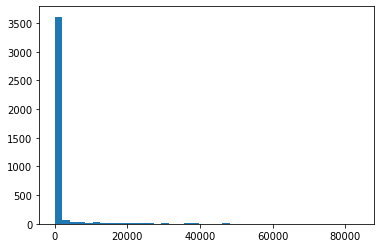

In [81]:
plt.hist(df_ico['time_diff_seconds'], bins=40)

(array([2400.,  307.,  201.,  140.,  174.,  100.,   77.]),
 array([  0,  50, 100, 150, 200, 300, 400, 500]),
 <a list of 7 Patch objects>)

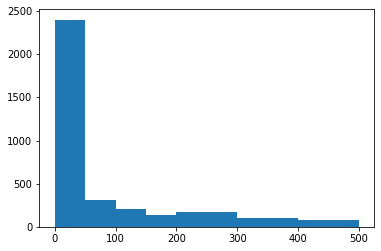

In [83]:
#bins_list = [0, 2, 4, 6, 8, 10, 20, 40, 60, 80, 100, 200, 300, 400, 500, 1000]
bins_list = [0, 50, 100, 150, 200, 300, 400, 500]

plt.hist(df_ico['time_diff_seconds'], bins=bins_list)

### 1.5. Plotting the number the transactions per time unit

In [84]:
df_ico['counter'] = 1

In [85]:
df_ico.set_index('DateTime', inplace=True)

In [86]:
df_ico.head(3)

,Txhash,Blockno,UnixTimestamp,From,To,ContractAddress,Value_IN(ETH),Value_OUT(ETH),CurrentValue @ $242.14/Eth,TxnFee(ETH),TxnFee(USD),Historical $Price/Eth,Status,ErrCode,Unnamed: 15,time_diff,time_diff_seconds,counter
DateTime,,,,,,,,,,,,,,,,,,
2019-09-26 19:56:15,0x06cea18dc00394f602a7c48935e0e91b9ed1a9fce632...,8626491,1569527775,0xa805e4a1907d7db21409cb1724e31e93b6f65369,NaN,0xd8dc1070b5510583728ee2afd6934877ea2de474,0.0,0,0.0,0.041048,9.939461,166.06,NaN,NaN,NaN,NaT,NaN,1
2019-09-26 20:02:37,0x48b8600c4eef68f17300b8797b3064c40a9954e5290c...,8626518,1569528157,0xa805e4a1907d7db21409cb1724e31e93b6f65369,0xd8dc1070b5510583728ee2afd6934877ea2de474,NaN,0.0,0,0.0,0.001589,0.384819,166.06,NaN,NaN,NaN,00:06:22,382.0,1
2019-09-27 01:49:00,0xcb46386ac3a5bfdbac997b4b89c5a2ba550cf9f91a02...,8628049,1569548940,0xa805e4a1907d7db21409cb1724e31e93b6f65369,0xd8dc1070b5510583728ee2afd6934877ea2de474,NaN,0.0,0,0.0,0.007296,1.766691,174.39,NaN,NaN,NaN,05:46:23,20783.0,1


### By Hour

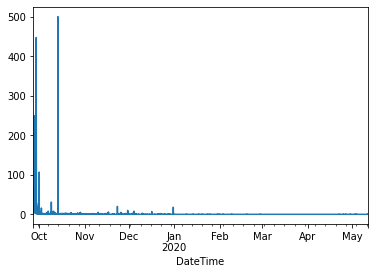

In [87]:
df_ico['counter'].resample('H').sum().plot()

### Plot by Day

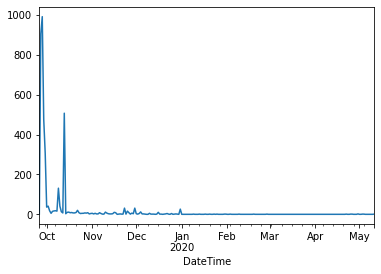

In [50]:
df_ico['counter'].resample('D').sum().plot()

### by Week

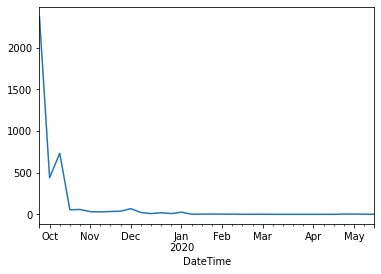

In [51]:
df_ico['counter'].resample('W').sum().plot()

## 2. Creating relationship between sellers and buyers for ICO transactions

### 2.1. Definine 1st order transactions

In [52]:
df_ico.head(3)

,Txhash,Blockno,UnixTimestamp,From,To,ContractAddress,Value_IN(ETH),Value_OUT(ETH),CurrentValue @ $242.14/Eth,TxnFee(ETH),TxnFee(USD),Historical $Price/Eth,Status,ErrCode,Unnamed: 15,time_diff,time_diff_seconds,counter
DateTime,,,,,,,,,,,,,,,,,,
2019-09-26 19:56:15,0x06cea18dc00394f602a7c48935e0e91b9ed1a9fce632...,8626491,1569527775,0xa805e4a1907d7db21409cb1724e31e93b6f65369,NaN,0xd8dc1070b5510583728ee2afd6934877ea2de474,0.0,0,0.0,0.041048,9.939461,166.06,NaN,NaN,NaN,NaT,NaN,1
2019-09-26 20:02:37,0x48b8600c4eef68f17300b8797b3064c40a9954e5290c...,8626518,1569528157,0xa805e4a1907d7db21409cb1724e31e93b6f65369,0xd8dc1070b5510583728ee2afd6934877ea2de474,NaN,0.0,0,0.0,0.001589,0.384819,166.06,NaN,NaN,NaN,00:06:22,382.0,1
2019-09-27 01:49:00,0xcb46386ac3a5bfdbac997b4b89c5a2ba550cf9f91a02...,8628049,1569548940,0xa805e4a1907d7db21409cb1724e31e93b6f65369,0xd8dc1070b5510583728ee2afd6934877ea2de474,NaN,0.0,0,0.0,0.007296,1.766691,174.39,NaN,NaN,NaN,05:46:23,20783.0,1


In [53]:
df_ico['1st_order'] = df_ico.apply(lambda row: True if row['From'] == '0x0000000000000000000000000000000000000000' else False, axis=1)

In [54]:
df_ico['1st_order'].sum()

0

In [55]:
df_ico.dtypes

Txhash                                 object
Blockno                                 int64
UnixTimestamp                           int64
From                                   object
To                                     object
ContractAddress                        object
Value_IN(ETH)                         float64
Value_OUT(ETH)                          int64
CurrentValue @ $242.14/Eth            float64
TxnFee(ETH)                           float64
TxnFee(USD)                           float64
Historical $Price/Eth                 float64
Status                                 object
ErrCode                                object
Unnamed: 15                           float64
time_diff                     timedelta64[ns]
time_diff_seconds                     float64
counter                                 int64
1st_order                                bool
dtype: object

In [56]:
df_ico[df_ico['1st_order']]

,Txhash,Blockno,UnixTimestamp,From,To,ContractAddress,Value_IN(ETH),Value_OUT(ETH),CurrentValue @ $242.14/Eth,TxnFee(ETH),TxnFee(USD),Historical $Price/Eth,Status,ErrCode,Unnamed: 15,time_diff,time_diff_seconds,counter,1st_order
DateTime,,,,,,,,,,,,,,,,,,,


In [58]:
df_ico[df_ico['1st_order']].resample('D').sum()['Quantity'].plot(style='.-')

KeyError: 'Quantity'

### 2.2. Definine 2nd order transactions

In [59]:
list_1st_order_buyers = list(df_ico[df_ico['1st_order'] == True]['To'].unique())
try:
    list_1st_order_buyers.remove('0x0000000000000000000000000000000000000000')
except:
    pass
len(list_1st_order_buyers)

0

In [60]:
df_ico['2nd_order'] = df_ico.apply(lambda row: True if row['From'] in list_1st_order_buyers else False, axis=1)

In [61]:
df_ico[df_ico['1st_order']].resample('D').sum()['Quantity'].plot(style='.-')
df_ico[df_ico['2nd_order']].resample('D').sum()['Quantity'].plot(style='.-')

KeyError: 'Quantity'

### 2.3. Definine 3rd order transactions

In [62]:
list_2st_order_buyers = list(df_ico[df_ico['2nd_order'] == True]['To'].unique())
#list_2st_order_buyers.remove('0x0000000000000000000000000000000000000000')
len(list_2st_order_buyers)

0

In [63]:
df_ico['3rd_order'] = df_ico.apply(lambda row: True if row['From'] in list_2st_order_buyers else False, axis=1)

### 2.4. Visualizing the transactions from differente orders

In [64]:
df_ico[df_ico['1st_order']].resample('D').sum()['Quantity'].plot(style='.-')
df_ico[df_ico['2nd_order']].resample('D').sum()['Quantity'].plot(style='.-')
df_ico[df_ico['3rd_order']].resample('D').sum()['Quantity'].plot(style='.-')
plt.legend(['1st_order', '2nd_order', '3rd_order'])

KeyError: 'Quantity'

## 3. Acumulated value for `TxnFee(ETH)`	

In [65]:
df_ico.head()

,Txhash,Blockno,UnixTimestamp,From,To,ContractAddress,Value_IN(ETH),Value_OUT(ETH),CurrentValue @ $242.14/Eth,TxnFee(ETH),...,Historical $Price/Eth,Status,ErrCode,Unnamed: 15,time_diff,time_diff_seconds,counter,1st_order,2nd_order,3rd_order
DateTime,,,,,,,,,,,,,,,,,,,,,
2019-09-26 19:56:15,0x06cea18dc00394f602a7c48935e0e91b9ed1a9fce632...,8626491,1569527775,0xa805e4a1907d7db21409cb1724e31e93b6f65369,NaN,0xd8dc1070b5510583728ee2afd6934877ea2de474,0.0,0,0.0,0.041048,...,166.06,NaN,NaN,NaN,NaT,NaN,1,False,False,False
2019-09-26 20:02:37,0x48b8600c4eef68f17300b8797b3064c40a9954e5290c...,8626518,1569528157,0xa805e4a1907d7db21409cb1724e31e93b6f65369,0xd8dc1070b5510583728ee2afd6934877ea2de474,NaN,0.0,0,0.0,0.001589,...,166.06,NaN,NaN,NaN,00:06:22,382.0,1,False,False,False
2019-09-27 01:49:00,0xcb46386ac3a5bfdbac997b4b89c5a2ba550cf9f91a02...,8628049,1569548940,0xa805e4a1907d7db21409cb1724e31e93b6f65369,0xd8dc1070b5510583728ee2afd6934877ea2de474,NaN,0.0,0,0.0,0.007296,...,174.39,NaN,NaN,NaN,05:46:23,20783.0,1,False,False,False
2019-09-27 02:56:49,0x88f213efc49f01bf65de14afa22bd6646ee2850b19ef...,8628364,1569553009,0x9c5fd85a035129f7ea1e6b61f915a98a96a15a22,0xd8dc1070b5510583728ee2afd6934877ea2de474,NaN,0.0,0,0.0,0.001080,...,174.39,Error(0),Out of gas,NaN,01:07:49,4069.0,1,False,False,False
2019-09-27 02:58:52,0xd72e18a9a68a2b4b39fb2fe01927ea7d9cdffdd5535e...,8628370,1569553132,0x07195ba1de6b040198760bcdbc28c0cfcb6c9773,0xd8dc1070b5510583728ee2afd6934877ea2de474,NaN,0.0,0,0.0,0.000332,...,174.39,Error(0),Out of gas,NaN,00:02:03,123.0,1,False,False,False


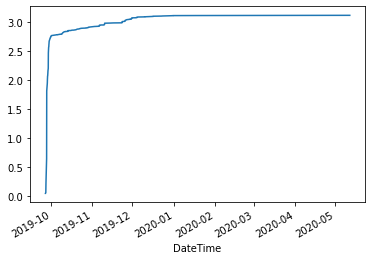

In [66]:
df_ico['TxnFee(ETH)'].cumsum().plot()

### 3.1. Acumulated plot for Quantity in token file

In [67]:
file_path = '../data_and_models/dadosicocomsucesso/AIGO_T.csv'
df_token = pd.read_csv(file_path, sep=';')
df_token.DateTime = pd.to_datetime(df_token.DateTime)
df_token.set_index('DateTime', inplace=True)
df_token.tail()

,Txhash,Blockno,UnixTimestamp,From,To,Quantity
DateTime,,,,,,
2020-04-30 00:51:23,0xe521693f2ad765dad0084538eb0f546d6b17658e11d2...,9970811,1588207883,0x2254a4a42bbbbbad5b5634439fa007b5ec2873f5,0x1a65c01bcaf31cfe498fb513d24906bfab61819b,0.000000
2020-04-30 01:05:34,0x05e644438c32ededfff56f312b2dba930e23a52d6082...,9970882,1588208734,0x2254a4a42bbbbbad5b5634439fa007b5ec2873f5,0x1a65c01bcaf31cfe498fb513d24906bfab61819b,1600.000000
2020-05-03 03:07:25,0xd0ce872b80b6ef3a4f078a45749ae702708fbfe4ca12...,9990723,1588475245,0xb983562984465912a7798c20d8997ffb6092a01d,0x6b71dcaa3fb9a4901491b748074a314dad9e980b,585210.953656
2020-05-04 04:41:33,0xc9616b8c2e904ea0866f2589e12f0c05c11f0932f756...,9997606,1588567293,0x24e7b906006260179707dcd32c0a7504567d8c74,0xf6b31d10f9731a6885944c9666c1626a0be110b7,500.000000
2020-05-11 22:10:58,0x217dd46bfef0eaffcad4551088d801bf446ea9f1d6d3...,10047558,1589235058,0x4f782d7e916f0d562b9bf47a87cc5f02c6edbeb5,0x77c0bce4cfca0dde4d5c2140a5557f9d46e64d2d,1000.000000


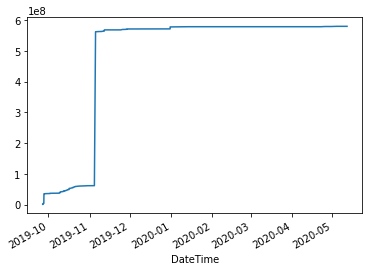

In [68]:
df_token['Quantity'].cumsum().plot()

## 4. Crossing the TxHash from Smart Contract and Tokens tables

In [69]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

In [70]:
set_sc_txhash = set(df_ico.Txhash.to_list())
set_t_txhash = set(df_token.Txhash.to_list())

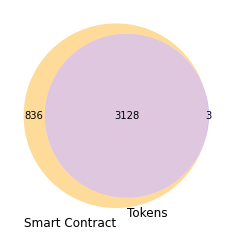

In [71]:
venn2([set_sc_txhash, set_t_txhash], set_labels=('Smart Contract', 'Tokens'), set_colors=('orange', 'blue'),)
plt.show() 

## 5. Defining the start of the ICO
The idea for this session is to stablish a way to define the start of the ICO by looking at the transactions.

In [72]:
df_ico.head()

,Txhash,Blockno,UnixTimestamp,From,To,ContractAddress,Value_IN(ETH),Value_OUT(ETH),CurrentValue @ $242.14/Eth,TxnFee(ETH),...,Historical $Price/Eth,Status,ErrCode,Unnamed: 15,time_diff,time_diff_seconds,counter,1st_order,2nd_order,3rd_order
DateTime,,,,,,,,,,,,,,,,,,,,,
2019-09-26 19:56:15,0x06cea18dc00394f602a7c48935e0e91b9ed1a9fce632...,8626491,1569527775,0xa805e4a1907d7db21409cb1724e31e93b6f65369,NaN,0xd8dc1070b5510583728ee2afd6934877ea2de474,0.0,0,0.0,0.041048,...,166.06,NaN,NaN,NaN,NaT,NaN,1,False,False,False
2019-09-26 20:02:37,0x48b8600c4eef68f17300b8797b3064c40a9954e5290c...,8626518,1569528157,0xa805e4a1907d7db21409cb1724e31e93b6f65369,0xd8dc1070b5510583728ee2afd6934877ea2de474,NaN,0.0,0,0.0,0.001589,...,166.06,NaN,NaN,NaN,00:06:22,382.0,1,False,False,False
2019-09-27 01:49:00,0xcb46386ac3a5bfdbac997b4b89c5a2ba550cf9f91a02...,8628049,1569548940,0xa805e4a1907d7db21409cb1724e31e93b6f65369,0xd8dc1070b5510583728ee2afd6934877ea2de474,NaN,0.0,0,0.0,0.007296,...,174.39,NaN,NaN,NaN,05:46:23,20783.0,1,False,False,False
2019-09-27 02:56:49,0x88f213efc49f01bf65de14afa22bd6646ee2850b19ef...,8628364,1569553009,0x9c5fd85a035129f7ea1e6b61f915a98a96a15a22,0xd8dc1070b5510583728ee2afd6934877ea2de474,NaN,0.0,0,0.0,0.001080,...,174.39,Error(0),Out of gas,NaN,01:07:49,4069.0,1,False,False,False
2019-09-27 02:58:52,0xd72e18a9a68a2b4b39fb2fe01927ea7d9cdffdd5535e...,8628370,1569553132,0x07195ba1de6b040198760bcdbc28c0cfcb6c9773,0xd8dc1070b5510583728ee2afd6934877ea2de474,NaN,0.0,0,0.0,0.000332,...,174.39,Error(0),Out of gas,NaN,00:02:03,123.0,1,False,False,False


In [73]:
df_ico.Quantity.plot()

AttributeError: 'DataFrame' object has no attribute 'Quantity'

### TxnFee vs. Number of Transactions

In [133]:
df_resample_sc_day = df_ico.resample('D').sum()[['TxnFee(ETH)', 'counter']]
df_resample_sc_hour = df_ico.resample('H').sum()[['TxnFee(ETH)', 'counter']]

df_resample_sc_day.head()

,TxnFee(ETH),counter
DateTime,,
2019-09-26,0.042638,2
2019-09-27,1.823193,905
2019-09-28,0.580917,991
2019-09-29,0.239000,476
2019-09-30,0.068185,307


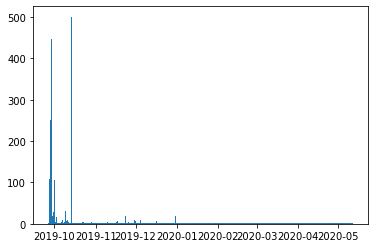

In [130]:
plt.bar(df_resample_sc_day.index, df_resample_sc_day.counter, )
plt.plot(df_resample_sc_day.index, df_resample_sc_day['TxnFee(ETH)'] )

<Figure size 1440x720 with 0 Axes>

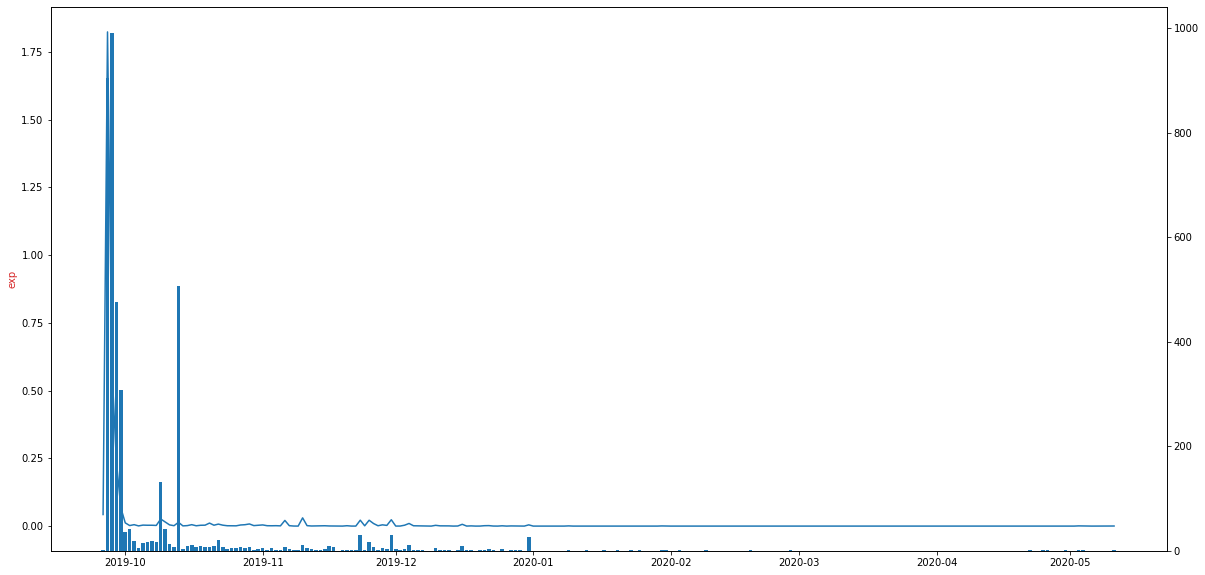

<Figure size 1440x720 with 0 Axes>

In [134]:
fig, ax1 = plt.subplots(figsize=(20,10))

color = 'tab:red'
#ax1.set_xlabel('time (s)')
ax1.set_ylabel('exp', color=color)
ax1.plot(df_resample_sc_day.index, df_resample_sc_day['TxnFee(ETH)'] )
#ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
#ax2.set_ylabel('sin', color=color)  # we already handled the x-label with ax1
ax2.bar(df_resample_sc_day.index, df_resample_sc_day.counter )
#ax2.tick_params(axis='y', labelcolor=color)

plt.figure(figsize=(20,10))
#fig.tight_layout()  # otherwise the right y-label is slightly clipped
#plt.show()


<Figure size 1440x720 with 0 Axes>

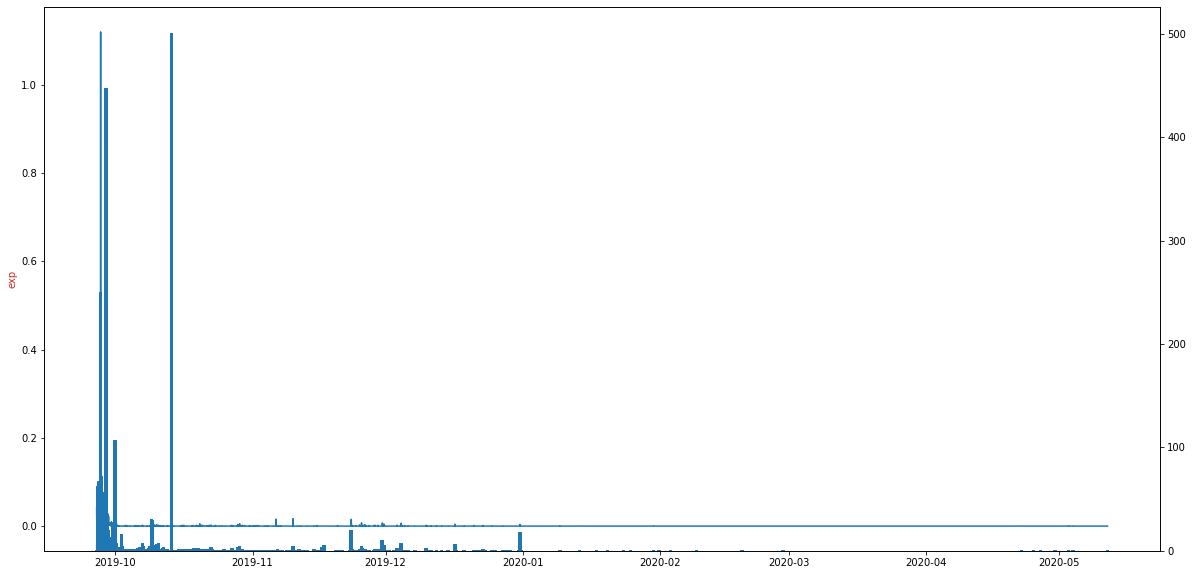

<Figure size 1440x720 with 0 Axes>

In [135]:
fig, ax1 = plt.subplots(figsize=(20,10))

color = 'tab:red'
#ax1.set_xlabel('time (s)')
ax1.set_ylabel('exp', color=color)
ax1.plot(df_resample_sc_hour.index, df_resample_sc_hour['TxnFee(ETH)'] )
#ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
#ax2.set_ylabel('sin', color=color)  # we already handled the x-label with ax1
ax2.bar(df_resample_sc_hour.index, df_resample_sc_hour.counter )
#ax2.tick_params(axis='y', labelcolor=color)

plt.figure(figsize=(20,10))
#fig.tight_layout()  # otherwise the right y-label is slightly clipped
#plt.show()


<Figure size 1440x720 with 0 Axes>

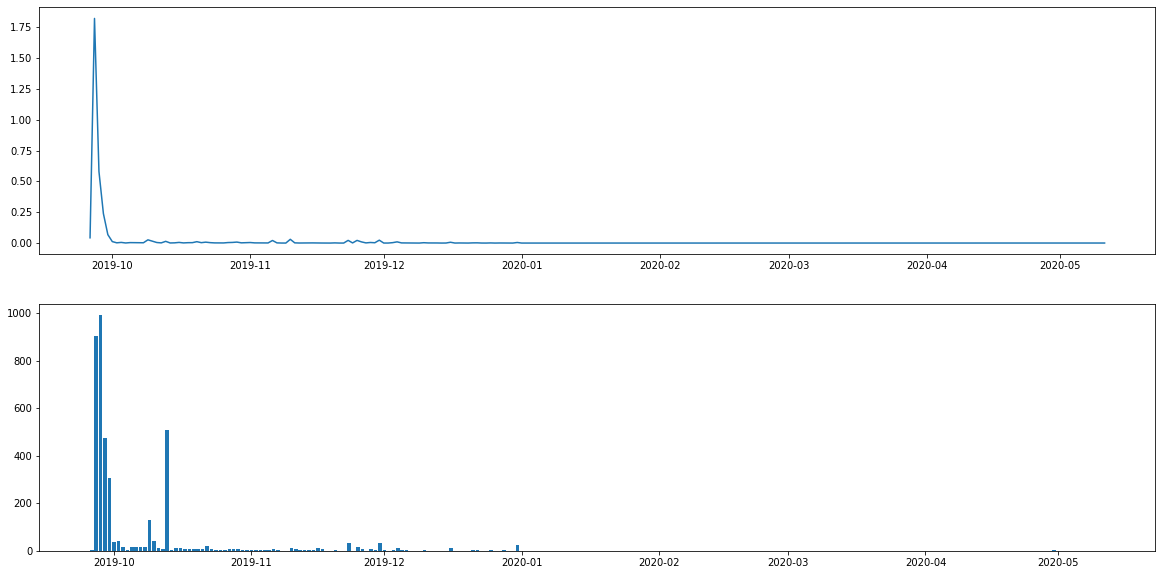

<Figure size 1440x720 with 0 Axes>

In [124]:
fig, (ax1,ax2) = plt.subplots(2,1, figsize=(20,10))

color = 'tab:red'
#ax1.set_xlabel('time (s)')
#ax1.set_ylabel('exp', color=color)
ax1.plot(df_resample_sc_day.index, df_resample_sc_day['TxnFee(ETH)'] )
#ax1.tick_params(axis='y', labelcolor=color)

#ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
#ax2.set_ylabel('sin', color=color)  # we already handled the x-label with ax1
ax2.bar(df_resample_sc_day.index, df_resample_sc_day.counter )
#ax2.tick_params(axis='y', labelcolor=color)

plt.figure(figsize=(20,10))
#fig.tight_layout()  # otherwise the right y-label is slightly clipped
#plt.show()

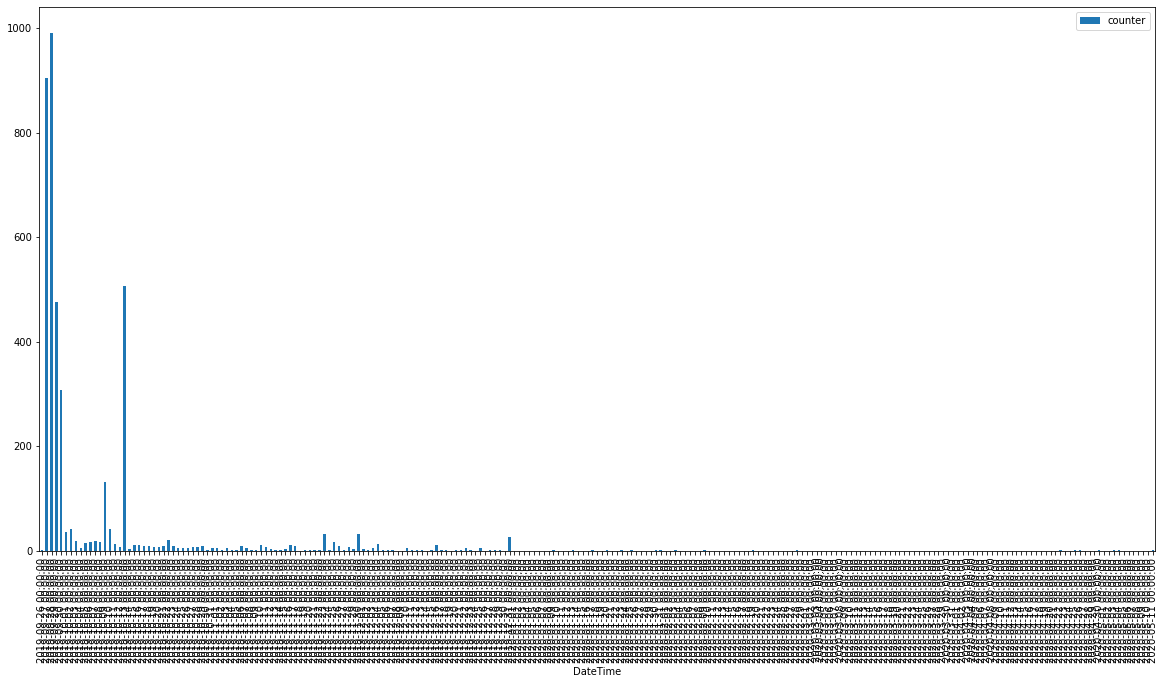

In [98]:
df_resample_sc_day.plot(y='counter', kind='bar', figsize=(20,10))